### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 11.1:</span> Supervised Machine Learning: regressione lineare

### Ingredienti del Supervised Machine Learning
Rete neurale: in dipendenza dai suoi parametri - pesi e bias - ha una certa classe di modelli che potrà utilizzare per compiere un fit.

Occorre quindi dividere il set di dati in due gruppi:

**TRAINING DATA SET** con il quale alleno la rete neurale ($90\%$).

**VALIDATION/TEST DATA SET** per testare se la rete neurale "ha imparato" ($10\%$).

L'obiettivo è fare il fit di una funzione $f(x_i)$ (**MODELLO**), ovvero trovare un set di parametri $p$.

I dati sono generati stocasticamente estraendo campioni dall'equazione

$$
    y_i= f(x_i) + \eta_i,
$$

dove $f(x_i)$ è appunto il modello e $\eta_i$ è una variabile di rumore gaussiano non correlato tale che $
\langle \eta_i \rangle=0$ (è centrata in zero) e $
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$

La misura dell'errore commesso dal fit è resa dalla mean square-error (**funzione di costo, va minimizzata con i dati di training**)
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
Il valore della funzione di costo per il miglior fit sul set di training è detto **in-sample error** $E_{in}$

Il valore della funzione di corso sul set di test è detto **out-of-sample error** $E_{out}$

Per un numero di dati tendente ad infinito $E_{out} \to E_{in}$, e tale valore è detto **bias** (misura del limite inferiore dell'errore, ovvero quanto posso migliorare avendo a disposizione infiniti dati). La differenza $(E_{out}-bias)$ è la **varianza**, indice dell'errore che commetto per aver allenato su un set di dati finito.

La comparazione $E_{in}$ ed $E_{out}$ è detta cross-validation procedure. Una delle osservazioni più importanti che possiamo fare è che $E_{out} \geq E_{in}$ quasi sempre. Questo perché i dati di test non sono stati utilizzati nella procedura di fitting. Se la differenza $E_{out}-E_{in}$ è grande significa che sto overfittando i miei dati.

Se aumento la complessità del modello a cui mi affido, riduco il bias, ma aumento la varianza $\Rightarrow$ trovo un minimo di $E_{out}$ per modelli di media complessità.

Nota: vengono chiamate epoche i cicli di ottimizzazione

### Regressione lineare

Si vuole allenare una rete neurale a compiere il fit lineare:
$$
f(x)=2x+1
$$

La funzione vera (modello) è quindi descritta dei due parametri:

In [13]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Si generano dunque i dati di training e quelli di validation

In [14]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) #DATI DI TRAINING
y_valid = np.random.normal(m * x_valid + b, sigma) #DATI DI VALIDATION

Si crea quindi un plot della funzione da trovare e del validation data set

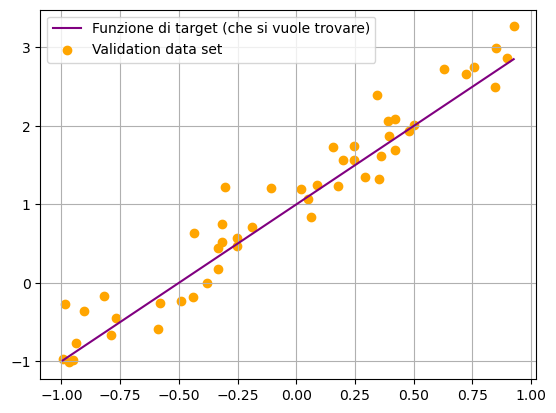

In [15]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, color='purple', label='Funzione di target (che si vuole trovare)')
plt.scatter(x_valid, y_valid, color='orange', label='Validation data set')
plt.legend()
plt.grid(True)
plt.show()

Un neurone della rete neurale è un operatore che riceve $n$ input, li somma tra loro con dei pesi ($w_i$) e vi aggiunge una costante $b$ (bias). Calibrare i pesi e il bias è ciò che viene appunto richiesto alla rete. Il neurone restituisce il valore calcolato dalla funzione di attivazione nel punto calcolato. Esistono diverse possibili funzioni di attivazioni (saturanti all'infinito o meno) ed occorre scegliere tra di esse a seconda del problema da risolvere (ad esempio: Preceptron, Sigmoid, Tanh, ReLU, ELU...). Più la funzione di attivazione è "piatta", più piccole modifiche ai pesi ed al bias causeranno piccole modifiche all'output.

Il teorema dell'approssimazione universale afferma che una rete neurale con un singolo hidden layer (rete neurale contenente quindi uno strato di neuroni intermedi tra input ed output) può approssimare ogni funzione continua, multi-input/multi-output con arbitraria precisione.

MA...

Per realizzare il fit di una retta basta solo un neurone, poiché esso costituisce proprio per sua natura una relazione lineare tra input ed output.

Inoltre, si sceglie l'ottimizzatore sdg e la MSE come funzione costo.

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#creazione di un layer denso con un input monodimensionale (le ascisse)
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


A questo punto i dati di training vengono comunicati alla rete neurale: l'ottimizzatore troverà i pesi ed i bias che minimizzino la funzione di costo (MSE)

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 23ms/step - loss: 3.8404 - mse: 3.8404 - val_loss: 3.0684 - val_mse: 3.0684
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 2.9150 - mse: 2.9150 - val_loss: 2.3642 - val_mse: 2.3642
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 2.2636 - mse: 2.2636 - val_loss: 1.8536 - val_mse: 1.8536
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 1.7853 - mse: 1.7853 - val_loss: 1.4737 - val_mse: 1.4737
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 1.4258 - mse: 1.4258 - val_loss: 1.1848 - val_mse: 1.1848
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 1.1508 - mse: 1.1508 - val_loss: 0.9581 - val_mse: 0.9581
Epoch 7/30
16/16 [==============================] - 0s 6ms/step - loss: 0.9344 - mse: 0.9344 - val_loss: 0.7803 - val_mse: 0.7803
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.7648 - mse: 0.7

Guardando i pesi ed i bias trovati posso capire se la regressione lineare ha avuto successo, confrontando i parametri (coefficiente angolare ed intercetta) con quelli attesi.

In [7]:
# return weights and biases
model.get_weights()

[array([[1.9127285]], dtype=float32), array([0.966483], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 18ms/step - loss: 0.1023 - mse: 0.1023

Test loss: 0.10230199992656708
Test accuracy: 0.10230199992656708


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032

Test loss: 0.003246691543608904
Test accuracy: 0.003246691543608904


### <span style="color:blue"> GRAFICO A) </span>

Di seguito, sono stati graficati gli andamenti della funzione di costo dei dati di train e test in funzione dell'epoca.

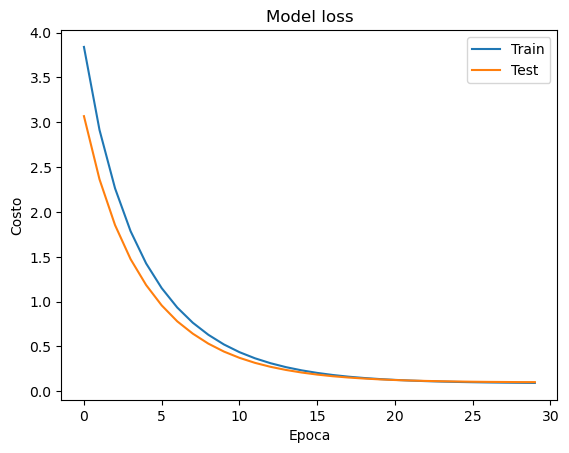

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Costo')
plt.xlabel('Epoca')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

### <span style="color:green"> GRAFICO B) </span> Predizione entro e fuori al dominio di training

Si eseguono ora delle previsioni sulla funzione, fittandola per valori della variabile indipendente mai visti dalla rete neurale (prima l'intervallo era $x\in[-1,1]$, ora $x\in[-5,5]$) e non appartenenti all'intervallo dei dati di training (ovviamente l'andamento lineare si presta a tale scopo, perché non ha cambi di pendenza/concavità).

7/7 [==============================] - 0s 2ms/step


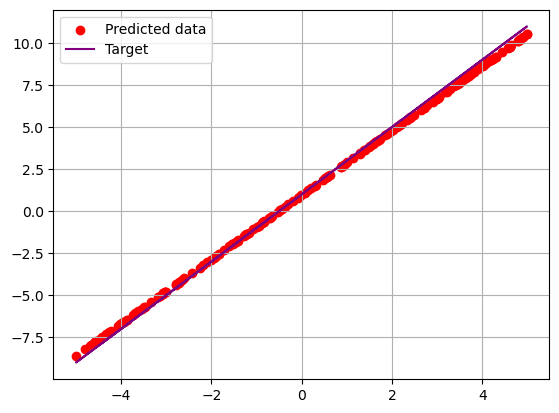

In [18]:
x_predicted = np.random.uniform(-5, 5, 200)
y_predicted = model.predict(x_predicted)
y_target = m * x_predicted + b 

plt.scatter(x_predicted, y_predicted,color='r', label = 'Predicted data')
plt.plot(x_predicted, y_target, color='purple', label = 'Target')
plt.grid(True)
plt.legend()
plt.show()

Se invece si provano a variare gli input ricevuti dalla rete neurale...

- se si aumenta il numero di epoche e/o il numero di dati di training si ottiene un fit più preciso (anche se per un andamento lineare già per poche epoche si ottiene un buon risultato, qui 10)
- se si aumenta la $\sigma$ del rumore Gaussiano la precisione del fit ovviamente si riduce. L'effetto è compensabile aumentando il numero di dati di training.